	Initialization Time: 0.424802064896
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
Total Time 12.2293860912
Pre loop Time 0.000879049301147
Inner loop time 11.8983895779
Outer loop time 0.089527130127


/Users/sverros/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


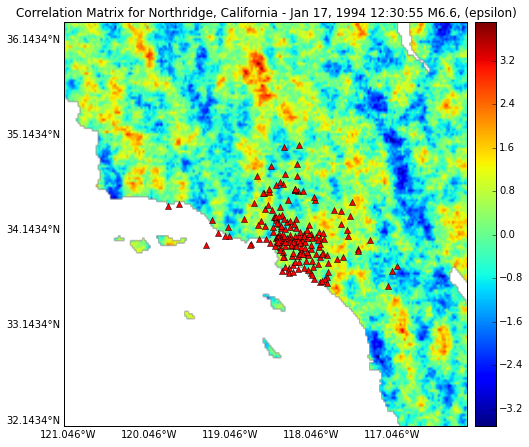

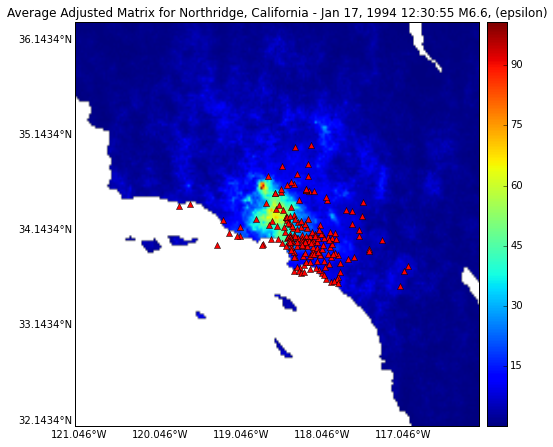

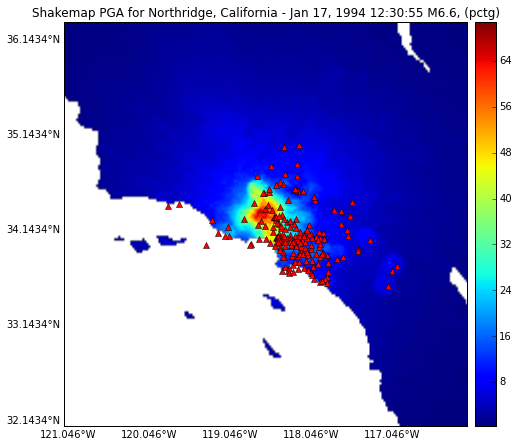

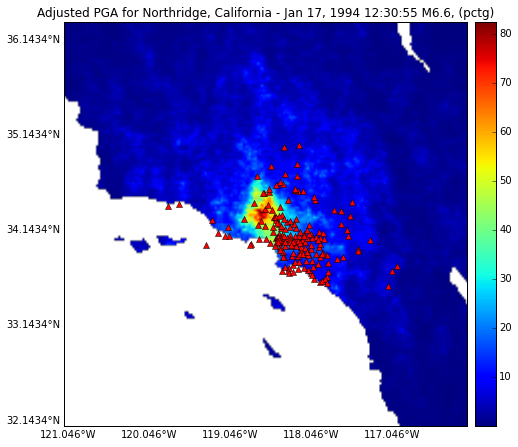

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from neicio.readstation import readStation
from neicio.shake import ShakeGrid
from neicio.gmt import GMTGrid
import time
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from Correlation.setup import initialize
from Correlation.loop import main
from Correlation.realizations import realizations
from Correlation.plotting import plot

# Variable of interest                                                                                                                                                                                                        
voi = 'PGA'

# Specify the radius of interest                                                                                                                                                                                              
r = 6

# Specify number of realizations
num_realizations = 1

# Intensity Factor
intensity_factor = 0.9

# Get shakemap for desired variable, PGA, uncertainty grid and stationdata                                                                                                                                                    
# Selected Stations: Units in pctg                                                                                                                                                                                            
shakemap = ShakeGrid('/Users/sverros/Documents/output/grid.xml', variable = '%s' % voi)

# Uncertainty Data: Units in ln(pctg)                                                                                                                                                                                         
uncertainty = ShakeGrid('/Users/sverros/Documents/output/uncertainty.xml', variable= 'STD%s' % voi)

# Station Data: Units in pctg                                                                                                                                                                                                 
stationlist = '/Users/sverros/Documents/output/stationlist.xml'
stationdata = readStation(stationlist)

# Used for plotting                                                                                                                                                                                                           
topofile = '/Users/sverros/Documents/etopo1_bed_g_f4.grd'


# Sets up grid spacing, site collections, and other data values
# optional parameters: dm, dn, the grid discritization defaulting to 1
variables = initialize(shakemap, uncertainty, stationdata)

# Calculate the random array, stored for testing
rand = np.random.randn(variables['N']*variables['M'])

# Main program for computing spatial correlation
# Output is a dictionary with the following keys
#     cor- grid of spatially correlated epsilon                                                                                                                                
#     data- grid of ShakeMap data                                                                                                                                              
#     data_new- data with added spatial correlation                                                                                                                            
#     grid_arr- array for storing grid indices for multiple realizations                                                                                                       
#     mu_arr- array for storing Sig21.T*Sig11inv for multiple realizations                                                                                                     
#     sigma_arr- array for storing sigma for multiple realizations  
out = main(variables, r, voi, rand, intensity_factor)

# Calculate multiple realizations
ACCUM_ARRAY = realizations(num_realizations, variables['N'], variables['M'], out['grid_arr'], 
                           out['mu_arr'], out['sigma_arr'], variables['uncertaintydata'], out['data'])

plot(out, variables, voi, shakemap, stationdata, topofile, ACCUM_ARRAY)

In [6]:
# Testing, computes output for varying R values
print np.size(stationdata['pga'])
rand = np.random.randn(variables['N']*variables['M'])

R = [5, 10, 15, 20, 25]

data_NEW = np.zeros([variables['M']*variables['N'], np.size(R)])

for k in range(0,np.size(R)):
    out = main(variables, R[k], voi, rand, 0.9)
    data_NEW[:,k] = np.reshape(out['data_new'], [variables['N']*variables['M']])


185
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
Total Time 10.7493550777
Pre loop Time 0.00068998336792
Inner loop time 10.445333004
Outer loop time 0.0611913204193
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
Total Time 28.0162940025
Pre loop Time 0.00107002258301
Inner loop time 27.5127110481
Outer loop time 0.254715919495
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
Total Time 102.258949041
Pre loop Time 0.000835180282593
Inner loop time 101.387789011
Outer loop time 0.612249135971
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
Total Time 309.178343058
Pre loop Time 0.0007438

In [7]:
print 'R, R+5'
for k in range(0,np.size(R)-1):
    print 'k, mean difference', np.mean(abs(data_NEW[:,k] - data_NEW[:,k+1]))
    print 'k, t-value, p-value', scipy.stats.ttest_ind(data_NEW[:,k], data_NEW[:,k+1])
    
print 'R, R = 35'
for k in range(0,np.size(R)-1):
    print 'max difference', max(data_NEW[:,k] - data_NEW[:,np.size(R)-1])
    print 'mean difference', np.mean(abs(data_NEW[:,k] - data_NEW[:,np.size(R)-1]))
    print 't-value, p-value', scipy.stats.ttest_ind(data_NEW[:,k], data_NEW[:,np.size(R)-1])

R, R+5
k, mean difference 0.359299179891
k, t-value, p-value (-1.0537830414525986, 0.29198607492383888)
k, mean difference 0.0978692414548
k, t-value, p-value (-0.33689177980273288, 0.73619954172319513)
k, mean difference 0.050311326249
k, t-value, p-value (-0.059955089763624229, 0.95219158302277629)
k, mean difference 0.0397765252324
k, t-value, p-value (-0.043991590367753075, 0.964911238921494)
R, R = 35
max difference 10.3116261108
mean difference 0.431917970535
t-value, p-value (-1.4950561025091536, 0.13490452979403136)
max difference 2.73167235952
mean difference 0.140664518742
t-value, p-value (-0.44103424503028743, 0.6591896343012319)
max difference 2.04029355439
mean difference 0.066536818436
t-value, p-value (-0.10398404376642195, 0.91718232364777896)
max difference 2.16604364695
mean difference 0.0397765252324
t-value, p-value (-0.043991590367753075, 0.964911238921494)
